# 📘 Non-Linear Model:- How to Know When 
# Multiple Linear Regression (MLR) May Not Work

### 🧭 Before Applying MLR — Clues from Data Exploration

---

## 1️⃣ Conceptual Clues

### 🔍 a. Nature of Variables (Feature-Target Relationship)
- If the real-world relationship is **nonlinear** (not a straight-line effect).
- Example:
  - Marketing: Higher advertising spend doesn’t always linearly increase sales (diminishing returns).
  - Healthcare: Risk of disease vs. age often shows a U-shape.

✅ **Visual Tip:** Scatter plots that curve, bend, or change direction.

---

### 🔍 b. Correlation Doesn’t Tell the Whole Story
- Low or near-zero Pearson correlation but visible non-linear pattern.
- MLR will struggle in these situations.

✅ **Visual Tip:** Weak correlation but clear pattern in scatter plot → suspect non-linearity.

---

### 🔍 c. Interaction Effects Present
- If the impact of one feature depends on the level of another feature.
- Example:
  - Marketing success depends on **both TV and Radio together**, not just independently.

✅ **MLR Limitation:** MLR cannot capture these unless you **manually add interaction terms**.

---

### 🔍 d. Forced Feature Engineering
- If you’re constantly needing to log-transform, square, or manually adjust variables → linear models may not be enough.

✅ **Action:** Time to explore non-linear methods that naturally capture patterns.

---

## 2️⃣ Summary Table: When to Consider Non-linear Models

| Clue                                           | What to Consider                                |
|-----------------------------------------------|------------------------------------------------|
| Curved scatter plot                           | Polynomial Regression, Decision Trees          |
| Weak correlation + visible pattern            | Decision Tree, Random Forest                   |
| Effects depend on feature combinations        | Decision Tree, Gradient Boosting               |
| Performance stalls after adding linear terms  | Non-linear regression or ensemble methods      |

---

## 3️⃣ Key Takeaway:
> "Linear regression draws straight lines. But real-life relationships are often curved, stepped, or conditional. Before you even fit a model, your plots and domain knowledge can tell you when it's time to move beyond MLR and explore non-linear algorithms."



### 📘 Linear vs Non-Linear Regression Demonstration Using Advertising Data

In [23]:
# Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [24]:
# Step 2: Load the Dataset

data = pd.read_csv('advertising_nonlinear.csv')


In [25]:
data.head()

,TV,Radio,Newspaper,Sales,Sales_Nonlinear
0,230.1,37.8,69.2,22.1,5.35
1,44.5,39.3,45.1,10.4,7.20
2,17.2,45.9,69.3,12.0,7.77
3,151.5,41.3,58.5,16.5,9.82
4,180.8,10.8,58.4,17.9,5.66


In [26]:
# Step 3: Select Features and Target

X = data[['TV', 'Radio']]
y_linear = data['Sales_Nonlinear']


In [27]:
X.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [28]:
y_linear.head()

0    5.35
1    7.20
2    7.77
3    9.82
4    5.66
Name: Sales_Nonlinear, dtype: float64

In [29]:
# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y_linear, test_size=0.2, random_state=42)


In [30]:
# Quiz Can you write here code to check size of each Variable after Split

In [31]:
# Step 5: Apply Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [32]:
# Predict
y_pred_linear = lin_reg.predict(X_test)


In [33]:
# Evaluate Linear Model
r2_lin = r2_score(y_test, y_pred_linear)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_linear))


print("Linear Regression R²:", round(r2_lin, 3))
print("Linear Regression RMSE:", round(rmse_lin, 3))


Linear Regression R²: 0.269
Linear Regression RMSE: 2.144


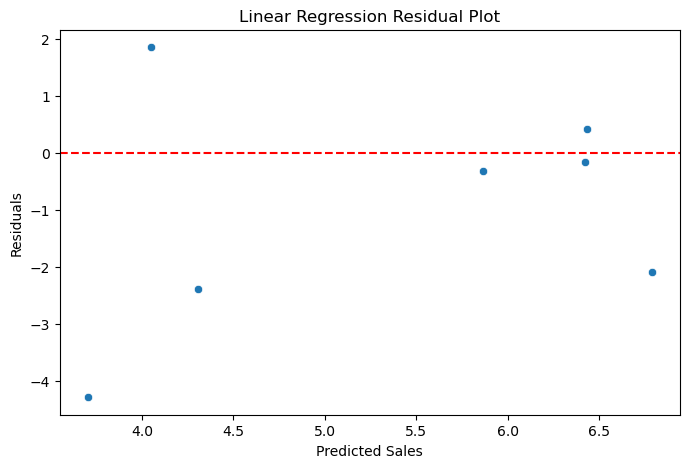

In [16]:
# Plot Residuals for Linear Regression
residuals_lin = y_test - y_pred_linear
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_linear, y=residuals_lin)
plt.axhline(0, color='red', linestyle='--')
plt.title('Linear Regression Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()


In [ ]:
# Step 6: Apply Polynomial Regression (Degree 2)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

# Create polynomial features (degree=2) to capture non-linear relationships

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# This transforms features X into [X, X², X1*X2, ...] for better model flexibility
 
# For first sample [2, 3]:

# Original: [x1=2, x2=3]

# Transformed becomes:

# [x1=2, x2=3, x1²=4, x1*x2=6, x2²=9]

# For second sample [1, 4]:

# Original: [x1=1, x2=4]

# Transformed becomes:

# [x1=1, x2=4, x1²=1, x1*x2=4, x2²=16]

# This allows linear regression to model relationships like:

# y = w0*x1 + w1*x2 + w2*x1² + w3*x1*x2 + w4*x2²

# which can capture curved patterns and feature interactions

In [34]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)


LinearRegression()

In [35]:

# Predict
y_pred_poly = poly_reg.predict(X_poly_test)


In [36]:

# Evaluate Polynomial Model
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Polynomial Regression R²:", round(r2_poly, 3))
print("Polynomial Regression RMSE:", round(rmse_poly, 3))


Polynomial Regression R²: 0.895
Polynomial Regression RMSE: 0.811


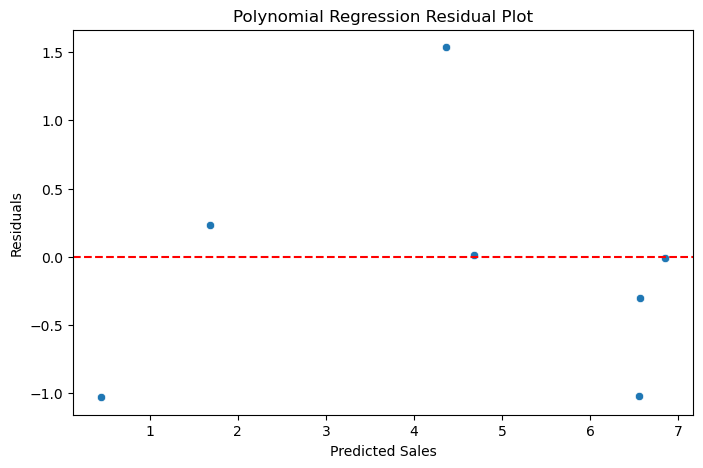

In [37]:

# Plot Residuals for Polynomial Regression
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_poly, y=residuals_poly)
plt.axhline(0, color='red', linestyle='--')
plt.title('Polynomial Regression Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()


In [ ]:
#Range is smaller (±1.0 vs. ±4.0 in the linear plot), meaning better accuracy.

In [38]:

# Step 7: Conclusion Summary
print("\nModel Comparison:")
print(f"Linear Regression → R²: {round(r2_lin, 3)}, RMSE: {round(rmse_lin, 3)}")
print(f"Polynomial Regression → R²: {round(r2_poly, 3)}, RMSE: {round(rmse_poly, 3)}")




Model Comparison:
Linear Regression → R²: 0.269, RMSE: 2.144
Polynomial Regression → R²: 0.895, RMSE: 0.811


In [22]:
# Key Insight:
# If the Polynomial Regression shows higher R² and 
# lower RMSE and more random residuals,
# it indicates a better fit for nonlinear data.
